In [1]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline


In [2]:
filename="/Users/irffanalahi/Research/Research_update/Dataqc/blueprint/bamqc/Regression/forreg.txt"

df=pd.read_csv(filename,sep="\t")

x=  'median depth'
y='mapped read'

xyfixed_lim=True

only_scatter=False

In [3]:
df.head()

,sample,median depth,mapped read
0,C00256A1bs.BS.gem_cnag_bs.GRCh38.20150707,42.49805,1346857073
1,C003VO55.BS.gem_cnag_bs.GRCh38.20150707,32.91320,1032926383
2,C0066P51.BS.gem_cnag_bs.GRCh38.20150707,26.92225,871576842
3,CS00C2F51.BS.gem_cnag_bs.GRCh38.20150707,33.32480,1144906199
4,S0018A52.BS.gem_cnag_bs.GRCh38.20150707,37.05710,1203234864


In [4]:

df=pd.DataFrame({ x: df[x], y: df[y] })
df.head()

,median depth,mapped read
0,42.49805,1346857073
1,32.91320,1032926383
2,26.92225,871576842
3,33.32480,1144906199
4,37.05710,1203234864


In [5]:
df=df.dropna()
df.head()

,median depth,mapped read
0,42.49805,1346857073
1,32.91320,1032926383
2,26.92225,871576842
3,33.32480,1144906199
4,37.05710,1203234864


In [6]:
corr = pearsonr(df[x], df[y])

#corr = [np.round(c, 5) for c in corr]
print(corr)

text='r = %s \nP = %s' % (format(corr[0], '.3f'), format(corr[1], ".3e") )

if corr[1]==0:
   text='r = %s \nP < 0.0001' % (format(corr[0], '.3f') ) 

(0.9788330258867741, 2.443991919768723e-10)


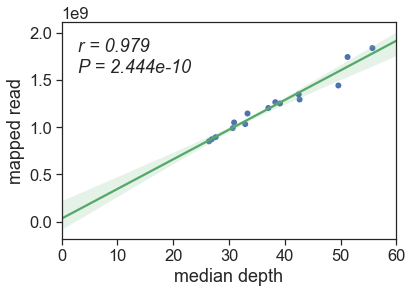

In [7]:
sns.set(style="ticks",font_scale=1.5)
if xyfixed_lim==True:
    plt.xlim([0, 60])
    #plt.ylim([0, 0.8])

g=sns.scatterplot(df[x], df[y],edgecolor='none')
#g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

if only_scatter==False:
    ax=sns.regplot(df[x], df[y],scatter=False,color="g")




    anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
    ax.add_artist(anc)


#default 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']




#hfont = {'fontname':'Helvetica'}
#plt.title('title',**hfont)

savename=filename+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()
#sns.jointplot(data=df, x=x, y=y, kind='reg', hue=df[celltype])